# Compiler Construction Lab 1








## Group Members

* 127820 Catherine Nduta
* 130816 Natalie Ndetei
* 134205 Ryan Muema
* 119199 Mutiku Adina
* 127690 Sharon Mwangi
* 134583 Jeffrey Ongicho
* 136667 Benard Wanyande

## Task

Two part lab:

1. Design a simple script that takes an English sentence(s) (either static or dynamic) and outputs the individual words. E.g. An input can be "He is a smart student". The output will be individual words "He", "is", "a", "smart" and "student". Each word on its own line.
2.   Edit the flex input file, specifying your own rules (patterns and actions). Explain what the resultant lexer from your specification file would do.

## Installing Prerequisites

In [1]:
!sudo apt install flex bison

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfl-dev libfl2
Suggested packages:
  bison-doc flex-doc
The following NEW packages will be installed:
  bison flex libfl-dev libfl2
0 upgraded, 4 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,072 kB of archives.
After this operation, 3,667 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 flex amd64 2.6.4-8build2 [307 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 bison amd64 2:3.8.2+dfsg-1build1 [748 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfl2 amd64 2.6.4-8build2 [10.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfl-dev amd64 2.6.4-8build2 [6,236 B]
Fetched 1,072 kB in 1s (716 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend canno

# Flex File

A simple script that takes an English sentence and outputs the inndividual words.

In [3]:
# /***Declaration***/
%%writefile exercise.l
%{
#include <stdio.h>
%}

/*** Rule section ***/
%%

[a-zA-Z]+       { printf("Word: %s\n", yytext); }
[0-9]+          { printf("Number: %s\n", yytext); }
[.,!?]          { printf("Punctuation: %s\n", yytext); }
[ \t\n\r]+      { /* Ignore whitespace */ }
.               { printf("Other: %s\n", yytext); }

%%

/*** User subroutines ***/
int main() {
    yylex();
    return 0;
}

int yywrap() {
    return 1;
/*
Explanation:
yylex() - this is the main flex function
          which runs the Rule Section
//yytext is the text in the buffer
//The yywrap function is used by Flex to determine what should happen when the end of the input file is reached
//[ \t\n\r]+: This rule matches one or more whitespace characters
//(space, tab, newline, carriage return) and does nothing, effectively ignoring them.
*/
}



Writing exercise.l


## Storing the input in a .txt file

In [5]:
%%writefile input.txt

Our group work is definitely the best because our script recognizes punctuation marks.

Overwriting input.txt


## Running the program (shell execution)

In [17]:
%%shell

flex exercise.l
gcc lex.yy.c -o lexer -lfl
./lexer < input.txt

Word: Our
Word: group
Word: work
Word: is
Word: definitely
Word: the
Word: best
Word: because
Word: our
Word: script
Word: recognizes
Word: punctuation
Word: marks
Punctuation: .


## Explanation
The resultant lexer generated from your Flex (Lex) specification file exercise.l will tokenize input text (English sentences) and classify the individual components into different categories based on the rules specified in the Flex script. Here's a breakdown of what the lexer does:

* **Tokenization**: The lexer reads the input text character by character and

attempts to match the characters against the rules defined in the Flex script.

* **Classification of Tokens**: Depending on the input characters and the rules specified, the lexer classifies the input into the following categories:

  * **Words**: Any sequence of one or more alphabetical characters (letters) will be classified as a word. It prints "Word: " followed by the word itself.

  * **Punctuation**: Characters like '.', ',', '!', and '?' are classified as punctuation. It prints "Punctuation: " followed by the punctuation character.

* **Output**: As the lexer processes the input, it prints the classification of each token along with the token itself. For example, if you input the sentence "This is a sample sentence.", the lexer will produce the following output:

  > 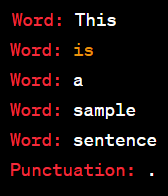
  
  The lexer we've described is a basic text tokenizer that can be used to analyze and categorize text into words, numbers, punctuation, and other characters based on the specified rules. It's a fundamental component in building parsers and compilers for processing and understanding textual data.




